In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Buscamos o conjunto de dados no GitHub da Alura. 
# Tormamos o número da inscrição o index desse data frame. 

dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
dados.head() #Para gerarmos um dataframe. 

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
dados.shape #função que permite a verificação da estrutura da tabela. 

(127380, 136)

In [ ]:
# Filtro construído para removermos os "indefinidos" no tipo de Escola. 
# Além disso, renomeamos algumas colunas que são necessárias para nossa análise.

base_limpa = dados.rename(columns=
                               {'NU_IDADE': 'Idade',
                              'TP_SEXO': 'Sexo',
                              'TP_ESCOLA': 'Ensino',
                              'TP_COR_RACA': 'Raça',
                              'IN_TREINEIRO': 'Treineiro',
                              'NU_NOTA_CN': 'Ciências da Natureza',	
                              'NU_NOTA_CH': 'Ciências Humanas',	
                              'NU_NOTA_LC': 'Linguagens e Códigos',	
                              'NU_NOTA_MT': 'Matemática',	
                              'NU_NOTA_REDACAO' : 'Redação'})

In [ ]:
base_limpa.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,TP_ESTADO_CIVIL,Raça,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,Ensino,TP_ENSINO,Treineiro,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Redação,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
Dados_Escolaridade = ['NU_INSCRICAO',
                          'Linguagens e Códigos', 'Matemática','Redação',
                          'Q001', 'Q002']


In [ ]:
#Para essa análise, vamos construir um novo Data Frame, limpar com as informações importante para análise.
Dados_Escolaridade = base_limpa.filter(items= Dados_Escolaridade)
Dados_Escolaridade.head()

,NU_INSCRICAO,Linguagens e Códigos,Matemática,Redação,Q001,Q002
0,190001004661,488.6,432.4,420.0,B,B
1,190001004674,375.3,NaN,400.0,C,C
2,190001004722,441.0,427.2,560.0,C,A
3,190001004735,551.5,499.9,500.0,E,C
4,190001004776,511.2,424.5,780.0,E,E


In [ ]:
# Construir os dicionários para deixarmos a base mais clara: 

q001andq002_dicionario = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'}

In [ ]:
Dados_Escolaridade['Q001'] = [q001andq002_dicionario[resp] for resp in Dados_Escolaridade.Q001]

In [ ]:
Dados_Escolaridade['Q002'] = [q001andq002_dicionario[Resp] for Resp in Dados_Escolaridade.Q002]

In [ ]:
base_limpa['Ensino'] =  base_limpa['Ensino'].map({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'})

In [ ]:
base_limpa.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,Idade,Sexo,TP_ESTADO_CIVIL,Raça,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,Ensino,TP_ENSINO,Treineiro,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,Redação,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,Não Respondeu,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,Não Respondeu,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,Não Respondeu,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


## **Análise por Instituição de Ensino**

Qual o desempenho dos participantes em relação ao seu Ensino?

Usando os métodos *.dropona()* e *.guery()*, o que se pretende é chegar a um Data Frame que nos permita responder a questão acima. Temos um conjunto extenso de dados, filtrando e agrupando pelas váriaveis necessárias, conseguimos trabalhar de forma mais eficiente.

O gráfico foi plotado usando os recursos da biblioteca Seaborn. Transformamos o Data Frame em uma classe Axes da biblioteca Matplot para podermos alterar algumas informações. 

Text(0.5, 1.0, 'Redação por Instituição de Ensino')

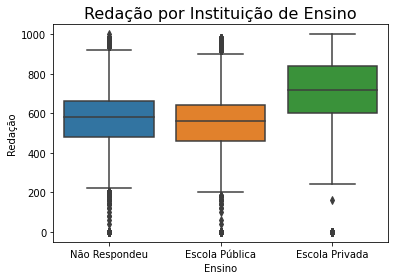

In [ ]:
#Redação por Instiuição de Ensino.
Redação_IE = base_limpa[['Redação', 'Ensino']]\
                        .dropna()

ax_redacao_ie = sns.boxplot(x='Ensino', y= 'Redação', data= Redação_IE)
ax_redacao_ie.set_title('Redação por Instituição de Ensino', fontsize = 16)


Text(0.5, 1.0, 'Linguagens por Instituição de Ensino')

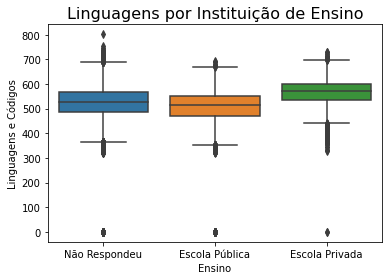

In [ ]:
#Linguagens e Códigos por Instituição de Ensino.
Linguagem_IE = base_limpa[['Linguagens e Códigos', 'Ensino']]\
                          .dropna()

ax_linguagem_ie = sns.boxplot(x='Ensino', y= 'Linguagens e Códigos', data= Linguagem_IE)
ax_linguagem_ie.set_title('Linguagens por Instituição de Ensino', fontsize = 16)


Text(0.5, 1.0, 'Linguagens por Instituição de Ensino')

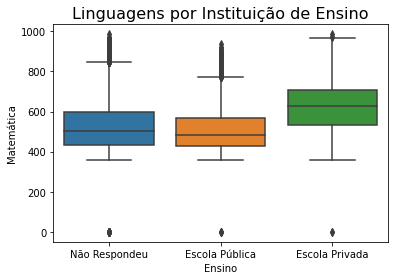

In [ ]:
#Matemática por Instituição de Ensino. 
Matematica_IE = base_limpa[['Matemática', 'Ensino']]\
                          .dropna()

ax_matematica_ie = sns.boxplot(x='Ensino', y= 'Matemática', data= Matematica_IE)
ax_matematica_ie.set_title('Linguagens por Instituição de Ensino', fontsize = 16)

## **Análise da escolaridade parental**

Há alguma correlação entre a escolaridade dos pais e o desempenho dos filhos na provada?

Usando os métodos *.filter()* e *.groupby()*, o que se pretende é chegar a um Data Frame que nos permita responder a questão acima. Temos um conjunto extenso de dados, filtrando e agrupando pelas váriaveis necessárias, conseguimos trabalhar de forma mais eficiente. 


In [ ]:
Dados_Escolaridade.head()

,NU_INSCRICAO,Linguagens e Códigos,Matemática,Redação,Q001,Q002
0,190001004661,488.6,432.4,420.0,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
1,190001004674,375.3,NaN,400.0,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
2,190001004722,441.0,427.2,560.0,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou.
3,190001004735,551.5,499.9,500.0,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou..."
4,190001004776,511.2,424.5,780.0,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [ ]:
#Agrupando os participantes pela escolaridade do pai. 
Dados_Escolaridade.filter(items= ['NU_INSCRICAO', 'Q001'])\
                                .groupby('Q001').count()\
                                .sort_values(by= 'NU_INSCRICAO', ascending = False)



,NU_INSCRICAO
Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",32958
Não completou a 4ª série/5º ano do Ensino Fundamental.,28390
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",17791
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",14771
Não sei.,11002
"Completou a Faculdade, mas não completou a Pós-graduação.",9417
Nunca estudou.,7309
Completou a Pós-graduação.,5742


In [ ]:
#Desempeho em Redação, agrupado pela escolaridade do pai.
Dados_Escolaridade.filter(items= ['Redação', 'Q001'])\
                                .groupby('Q001').mean()\
                                .sort_values(by= 'Redação', ascending = False)

,Redação
Q001,
Completou a Pós-graduação.,694.481798
"Completou a Faculdade, mas não completou a Pós-graduação.",666.182500
"Completou o Ensino Médio, mas não completou a Faculdade.",597.480828
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",566.973559
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",550.778514
Não sei.,528.944662
Não completou a 4ª série/5º ano do Ensino Fundamental.,524.401014
Nunca estudou.,484.716832


In [ ]:
#Desempenho em Linguagens e Códigos, agrupado pela escolaridade do pai. 
Dados_Escolaridade.filter(items= ['Linguagens e Códigos', 'Q001'])\
                                .groupby('Q001').mean()\
                                .sort_values(by= 'Linguagens e Códigos', ascending = False)

,Linguagens e Códigos
Q001,
Completou a Pós-graduação.,568.607579
"Completou a Faculdade, mas não completou a Pós-graduação.",558.972425
"Completou o Ensino Médio, mas não completou a Faculdade.",530.948090
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",518.082462
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",511.954354
Não sei.,507.638920
Não completou a 4ª série/5º ano do Ensino Fundamental.,500.342145
Nunca estudou.,484.966812


In [ ]:
#Desempenho em matemática, agrupado pela escolaridade do pai.
Dados_Escolaridade.filter(items= ['Matemática', 'Q001'])\
                                .groupby('Q001').mean()\
                                .sort_values(by= 'Matemática', ascending = False)

,Matemática
Q001,
Completou a Pós-graduação.,625.670445
"Completou a Faculdade, mas não completou a Pós-graduação.",599.656672
"Completou o Ensino Médio, mas não completou a Faculdade.",539.291168
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",515.936703
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",507.091631
Não sei.,495.871718
Não completou a 4ª série/5º ano do Ensino Fundamental.,486.244628
Nunca estudou.,465.939755


In [ ]:
#Agrupando os participantes pela escolaridade da mãe. 
Dados_Escolaridade.filter(items= ['NU_INSCRICAO', 'Q002'])\
                                .groupby('Q002').count()\
                                .sort_values(by= 'NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",40808
Não completou a 4ª série/5º ano do Ensino Fundamental.,21378
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",17121
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",16729
"Completou a Faculdade, mas não completou a Pós-graduação.",12801
Completou a Pós-graduação.,10042
Nunca estudou.,4835
Não sei.,3666


In [ ]:
#Desempenho em Redação, agrupado pela escolaridade da mãe. 
Dados_Escolaridade.filter(items= ['Redação', 'Q002'])\
                                .groupby('Q002').mean()\
                                .sort_values(by= 'Redação', ascending = False)

,Redação
Q002,
Completou a Pós-graduação.,669.617499
"Completou a Faculdade, mas não completou a Pós-graduação.",649.258848
"Completou o Ensino Médio, mas não completou a Faculdade.",583.035725
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",550.607473
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",537.094208
Não completou a 4ª série/5º ano do Ensino Fundamental.,514.290375
Não sei.,495.318988
Nunca estudou.,472.634458


In [ ]:
#Desempenho em Lingagens e Códigos, agrupados pela escolaridade da mãe. 
Dados_Escolaridade.filter(items= ['Linguagens e Códigos', 'Q002'])\
                                .groupby('Q002').mean()\
                                .sort_values(by= 'Linguagens e Códigos', ascending = False)

,Linguagens e Códigos
Q002,
Completou a Pós-graduação.,557.416892
"Completou a Faculdade, mas não completou a Pós-graduação.",550.060413
"Completou o Ensino Médio, mas não completou a Faculdade.",525.466864
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",512.424133
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",506.940866
Não completou a 4ª série/5º ano do Ensino Fundamental.,497.431206
Não sei.,493.749755
Nunca estudou.,482.765147


In [ ]:
#Desempenho em redação, agrupado pela escolaridade da mãe. 
Dados_Escolaridade.filter(items= ['Matemática', 'Q002'])\
                                .groupby('Q002').mean()\
                                .sort_values(by= 'Matemática', ascending = False)

,Matemática
Q002,
Completou a Pós-graduação.,600.746350
"Completou a Faculdade, mas não completou a Pós-graduação.",583.006366
"Completou o Ensino Médio, mas não completou a Faculdade.",528.117567
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",504.381942
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",497.633492
Não sei.,485.654939
Não completou a 4ª série/5º ano do Ensino Fundamental.,480.877321
Nunca estudou.,461.146604


### **Análise a partir da faixa salarial**


O quanto a faixa salarial familiar interfere no desempenho dos alunos?
 
Os alunos cujas familias possuem melhor condição salarial, estão em escolas particulares? 

Usando os métodos .filter() e .groupby(), o que se pretende é chegar a um Data Frame que nos permita responder a questão acima. Para definir quais são de escola pública e quais são de escola privada, vamos usar o método *.where()*. 

In [ ]:
#Construção do novo Data Frame:
dados_faixa_salarial = ['NU_INSCRICAO',
                        'Ensino',
                        'Linguagens e Códigos', 'Matemática','Redação',
                        'Q006']

Dados_Faixa_Salarial = base_limpa.filter(items= dados_faixa_salarial)
Dados_Faixa_Salarial = Dados_Faixa_Salarial.rename(columns=
                               {'Q006': 'Renda_Mensal'})

In [ ]:
Dados_Faixa_Salarial.head()

,NU_INSCRICAO,Ensino,Linguagens e Códigos,Matemática,Redação,Renda_Mensal
0,190001004661,Não Respondeu,488.6,432.4,420.0,B
1,190001004674,Não Respondeu,375.3,NaN,400.0,B
2,190001004722,Não Respondeu,441.0,427.2,560.0,C
3,190001004735,Não Respondeu,551.5,499.9,500.0,B
4,190001004776,Não Respondeu,511.2,424.5,780.0,E


In [ ]:
dicionario_renda = {
                    'A': 'Nenhuma renda',
                    'B': 'Até R$ 998,00.',
                    'C': 'De R$ 998,01 até R$ 1.497,00.',
                    'D': 'De R$ 1.497,01 até R$ 1.996,00.',
                    'E': 'De R$ 1.996,01 até R$ 2.495,00.',
                    'F': 'De R$ 2.495,01 até R$ 2.994,00.',
                    'G': 'De R$ 2.994,01 até R$ 3.992,00.',
                    'H': 'De R$ 3.992,01 até R$ 4.990,00.',
                    'I': 'De R$ 4.990,01 até R$ 5.988,00.',
                    'J': 'De R$ 5.988,01 até R$ 6.986,00.',
                    'K': 'De R$ 6.986,01 até R$ 7.984,00.',
                    'L': 'De R$ 7.984,01 até R$ 8.982,00.',
                    'M': 'De R$ 8.982,01 até R$ 9.980,00.',
                    'N': 'De R$ 9.980,01 até R$ 11.976,00.',
                    'O': 'De R$ 11.976,01 até R$ 14.970,00.',
                    'P': 'De R$ 14.970,01 até R$ 19.960,00.',
                    'Q': 'Mais de R$ 19.960,00.'}

In [ ]:
Dados_Faixa_Salarial['Renda'] = [dicionario_renda[resp] for resp in Dados_Faixa_Salarial.Renda_Mensal]

In [ ]:
#Data Frame com o detalhamento da renda mensal construído.
Dados_Faixa_Salarial.head()

,NU_INSCRICAO,Ensino,Linguagens e Códigos,Matemática,Redação,Renda_Mensal,Renda
0,190001004661,Não Respondeu,488.6,432.4,420.0,B,"Até R$ 998,00."
1,190001004674,Não Respondeu,375.3,NaN,400.0,B,"Até R$ 998,00."
2,190001004722,Não Respondeu,441.0,427.2,560.0,C,"De R$ 998,01 até R$ 1.497,00."
3,190001004735,Não Respondeu,551.5,499.9,500.0,B,"Até R$ 998,00."
4,190001004776,Não Respondeu,511.2,424.5,780.0,E,"De R$ 1.996,01 até R$ 2.495,00."


In [ ]:
#Agrupando os participantes pela renda mensal da família. 
Dados_Faixa_Salarial.filter(items= ['NU_INSCRICAO', 'Renda'])\
                                .groupby('Renda').count()\
                                .sort_values(by= 'NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
Renda,
"De R$ 998,01 até R$ 1.497,00.",32594
"Até R$ 998,00.",31790
"De R$ 1.497,01 até R$ 1.996,00.",12555
"De R$ 1.996,01 até R$ 2.495,00.",11863
"De R$ 2.994,01 até R$ 3.992,00.",7527
Nenhuma renda,5840
"De R$ 2.495,01 até R$ 2.994,00.",5640
"De R$ 3.992,01 até R$ 4.990,00.",4816
"De R$ 4.990,01 até R$ 5.988,00.",3552


In [ ]:
#Desempenho em redação, agrupado pela renda mensal familiar. 
Dados_Faixa_Salarial.filter(items= ['Redação', 'Renda'])\
                                .groupby('Renda')\
                                .mean().sort_values(by= 'Redação', ascending = False)

,Redação
Renda,
"Mais de R$ 19.960,00.",740.543210
"De R$ 14.970,01 até R$ 19.960,00.",731.663244
"De R$ 11.976,01 até R$ 14.970,00.",720.402450
"De R$ 9.980,01 até R$ 11.976,00.",703.358779
"De R$ 7.984,01 até R$ 8.982,00.",700.683938
"De R$ 8.982,01 até R$ 9.980,00.",693.121693
"De R$ 6.986,01 até R$ 7.984,00.",683.689628
"De R$ 5.988,01 até R$ 6.986,00.",674.779699
"De R$ 4.990,01 até R$ 5.988,00.",660.337302


In [ ]:
renda_ensino = ['NU_INSCRICAO',
                        'Ensino',
                        'Renda',
                        'Renda_Mensal']

Renda_Ensino = Dados_Faixa_Salarial.filter(items= renda_ensino)

In [ ]:
Renda_Ensino.head()

,NU_INSCRICAO,Ensino,Renda,Renda_Mensal
0,190001004661,Não Respondeu,"Até R$ 998,00.",B
1,190001004674,Não Respondeu,"Até R$ 998,00.",B
2,190001004722,Não Respondeu,"De R$ 998,01 até R$ 1.497,00.",C
3,190001004735,Não Respondeu,"Até R$ 998,00.",B
4,190001004776,Não Respondeu,"De R$ 1.996,01 até R$ 2.495,00.",E


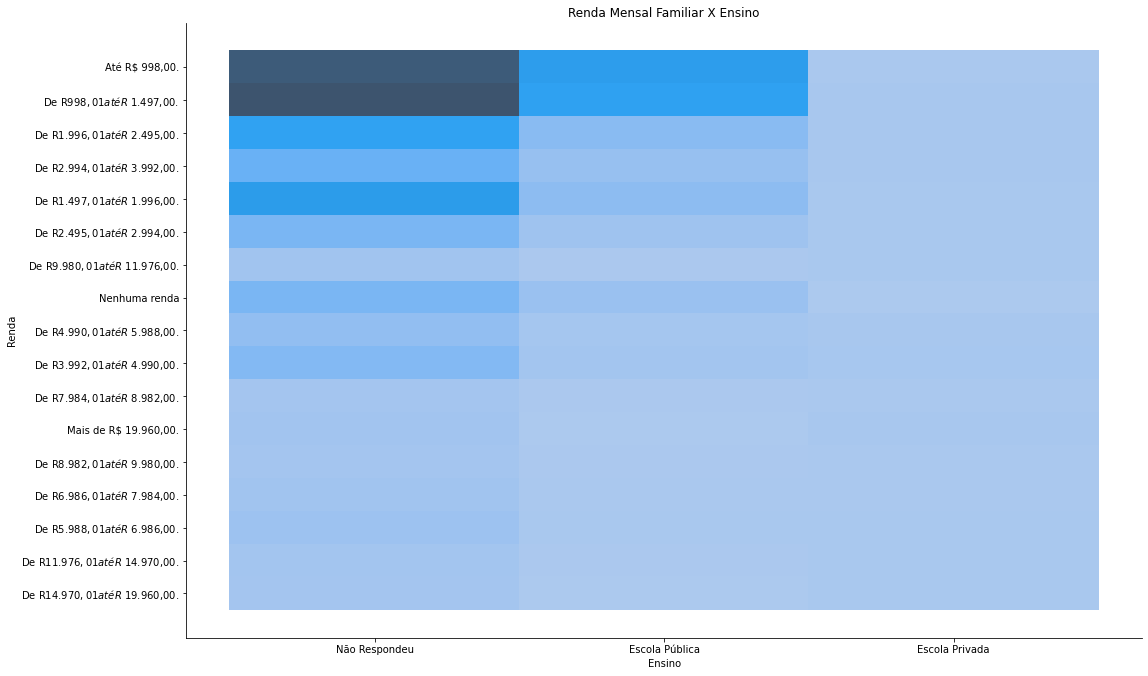

In [ ]:
ax_renda = sns.histplot(data= Renda_Ensino, x= 'Ensino', y= 'Renda')\
                              .set(title='Renda Mensal Familiar X Ensino')\
                              .fig.set_size_inches(30,10)

